News Data Sample:


,headline,url,publisher,date,stock,date_only,Date
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,2020-05-22



Stock Data Sample:


,Date,Open,High,Low,Close,Volume,stock,SMA_20,RSI_14,MACD,...,BB_Lower,ADX,Stoch_K,Stoch_D,Returns,Volatility,Sharpe_Rolling,Sharpe,Cum_Returns,Close_sp500
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,135480400.0,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.218298,NaN,3257.850098
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,146322800.0,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.009770,NaN,NaN,1.218298,-0.009770,3234.850098
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,118387200.0,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.007937,NaN,NaN,1.218298,-0.001910,3246.280029
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,108872000.0,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.004714,NaN,NaN,1.218298,-0.006616,3237.179932
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,132079200.0,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.015958,NaN,NaN,1.218298,0.009237,3253.050049


News Data with Sentiment:


,Date,headline,Sentiment
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.000
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.000
2,2020-05-26,71 Biggest Movers From Friday,0.000
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.000
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.296



Daily Sentiment Sample:


,Date,Sentiment,Tone
0,2020-01-01,-0.510600,negative
1,2020-01-02,-0.058971,negative
2,2020-01-03,-0.033113,neutral
3,2020-01-05,0.458800,positive
4,2020-01-06,0.087663,positive


Stock Data with Returns:


,Date,Close,Returns
0,2020-01-03,74.357498,-0.972204
1,2020-01-06,74.949997,0.796825
2,2020-01-07,74.597504,-0.470305
3,2020-01-08,75.797501,1.608629
4,2020-01-09,77.407501,2.124081


Aligned Data:


,Date,Sentiment,Tone,Returns
0,2020-01-03,-0.033113,neutral,-0.972204
1,2020-01-06,0.087663,positive,0.796825
2,2020-01-07,0.019188,neutral,-0.470305
3,2020-01-08,0.103809,positive,1.608629
4,2020-01-09,0.079479,neutral,2.124081


Direct Correlation: r = 0.1703, p-value = 0.0739
Lag 1 Correlation: r = 0.0272, p-value = 0.7777
Lag 2 Correlation: r = 0.0888, p-value = 0.3586
Lag 3 Correlation: r = -0.0018, p-value = 0.9850


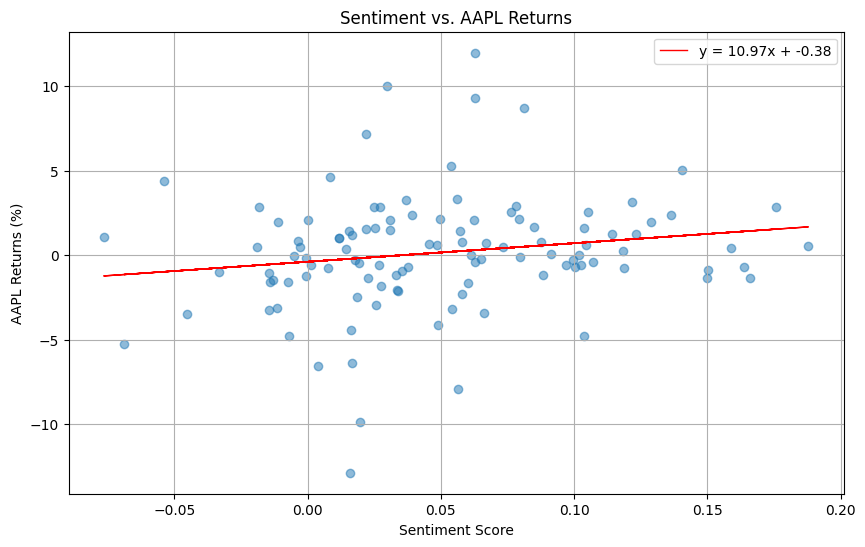

Saved to '../data/sentiment_returns_aapl_2020.csv'


In [1]:
# Cell 1: Setup imports and paths
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))  # Add project root to path
from src.correlation_analysis import *
import pandas as pd

# File paths (relative to notebooks/)
news_file  = '../data/fnspid_news_cleaned_2020.csv'
stock_file = '../data/aapl_with_indicators_2020.csv'

# Cell 2: Load data
news_df, stock_df = load_and_prepare_data(news_file, stock_file, news_date_col='date', stock_date_col='Date')
print("News Data Sample:")
display(news_df.head())
print("\nStock Data Sample:")
display(stock_df.head())

# Cell 3: Sentiment analysis
news_df_with_sentiment, daily_sentiment = perform_sentiment_analysis(news_df)
print("News Data with Sentiment:")
display(news_df_with_sentiment[['Date', 'headline' if 'headline' in news_df_with_sentiment.columns else 'title', 'Sentiment']].head())
print("\nDaily Sentiment Sample:")
display(daily_sentiment.head())

# Cell 4: Stock returns
stock_df_with_returns = calculate_stock_returns(stock_df)
print("Stock Data with Returns:")
display(stock_df_with_returns[['Date', 'Close', 'Returns']].head())

# Cell 5: Align data
aligned_df = align_data(daily_sentiment, stock_df_with_returns)
print("Aligned Data:")
display(aligned_df.head())

# Cell 6: Calculate correlations
r_direct, p_direct = calculate_correlation(aligned_df, lag=0)
print(f"Direct Correlation: r = {r_direct:.4f}, p-value = {p_direct:.4f}")
for lag in [1, 2, 3]:
    r_lag, p_lag = calculate_correlation(aligned_df, lag=lag)
    print(f"Lag {lag} Correlation: r = {r_lag:.4f}, p-value = {p_lag:.4f}")

# Cell 7: Plot
plot_correlation(aligned_df, save_path='task-3-plots/sentiment_vs_returns_aapl.png')

# Cell 8: Save results
aligned_df.to_csv('../data/sentiment_returns_aapl_2020.csv', index=False)
print("Saved to '../data/sentiment_returns_aapl_2020.csv'")